# Deep Learning - Homework 1
# Multi-Layer Perceptron - Regression(scratch)


# Function Definitions

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# Pre Processing Functions
def split_train_test_data(X, train_ratio):
    split_index = int(len(X) * train_ratio)

    X_train = X[:split_index]
    X_test = X[split_index:]

    return X_train, X_test


def normalize(list):
    min_val = min(list)
    max_val = max(list)

    return [(x - min_val) / (max_val - min_val) for x in list]


def generate_shifted_series_with_target(data, num_shifts):
    target_shift = 1
    data_array = data.to_numpy().flatten()
    num_samples = len(data_array)

    shifted_data = np.zeros((num_samples, num_shifts + 1))
    shifted_data[:, 0] = data_array
    for shift in range(1, num_shifts + 1):
        shifted_data[:, shift] = np.roll(data_array, shift)

    target = np.roll(data_array, -target_shift)
    target = target[:-target_shift]

    return shifted_data[:-target_shift, :], target


# Activation Functions

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


def leaky_relu(x):
    alpha = 0.01
    return np.maximum(alpha * x, x)

def leaky_relu_derivative(x):
    alpha = 0.01
    return np.where(x < 0, alpha, 1)


def get_activation_function(name):

    if name == "relu":
        return relu, relu_derivative
    elif name == "leaky relu":
        return leaky_relu, leaky_relu_derivative
    else:
        raise ValueError("Invalid activation function name")


# Neural Network Layer initialization Function
def initialize_Layer(previous_layer, next_layer, activation_function):
    W = np.random.uniform(-0.5, 0.5, size=(next_layer, previous_layer))
    Wb = np.ones((next_layer, 1))
    NET = np.zeros((next_layer, 1))
    F, dF = get_activation_function(activation_function)
    O = np.zeros((next_layer, 1))

    return W, Wb, NET, F, dF, O


# Plot Functions
def plot_progress(epoch, x_train, output_train, mse_train, x_test, output_test, mse_test):
    mse_train = np.array(mse_train)
    mse_test = np.array(mse_test)

    plt.clf()

    plt.subplot(2, 2, 1)
    plt.plot(x_train, color='blue', label='Actual', linewidth=1)
    plt.plot(output_train, color='red', label='Prediction', linewidth=1)
    plt.title('Train')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(mse_train[:epoch+1], color='blue')
    plt.title('MSE - Train')
    plt.xlabel('Epoch')

    plt.subplot(2, 2, 3)
    plt.plot(x_test, color='blue', label='Actual', linewidth=1)
    plt.plot(output_test, color='red', label='Prediction', linewidth=1)
    plt.title('Test')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(mse_test[:epoch+1], color='blue')
    plt.title('MSE - Test')
    plt.xlabel('Epoch')

    plt.tight_layout()
    plt.pause(0.1)


def plot_regression(x_train, d_train, output_train, x_test, d_test, output_test):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].plot(x_train[:, 0], d_train, 'b.', label='Actual')
    axes[0].plot(x_train[:, 0], output_train, 'r.', label='Prediction')
    axes[0].set_title('Regression - Train')
    axes[0].set_xlabel('Input')
    axes[0].set_ylabel('Output')
    axes[0].legend()

    m_train, b_train = np.polyfit(x_train[:, 0], output_train.flatten(), 1)
    axes[0].plot(x_train[:, 0], m_train * x_train[:, 0] + b_train, color='black', label='Best Fit', linewidth=3)

    axes[1].plot(x_test[:, 0], d_test, 'b.', label='Actual')
    axes[1].plot(x_test[:, 0], output_test, 'r.', label='Prediction')
    axes[1].set_title('Regression - Test')
    axes[1].set_xlabel('Input')
    axes[1].set_ylabel('Output')
    axes[1].legend()

    m_test, b_test = np.polyfit(x_test[:, 0], output_test.flatten(), 1)
    axes[1].plot(x_test[:, 0], m_test * x_test[:, 0] + b_test, color='black', label='Best Fit', linewidth=3)

    plt.tight_layout()
    plt.show()

# Hyperparameter Setting

In [6]:
train_test_ratio = 0.7

# Number of Neurons
N0 = 10
N1 = 64
N2 = 32
N3 = 16
N4 = 1

# Learning Rate
eta1 = 0.05
eta2=eta3=eta4=0.01

# Number of Epochs
epoch_mlp = 50

# Activation Function
F1 =F2=F3=F4= "leaky relu"


# Training Options
train_bias = False

# Fixed seed for reproducibility
np.random.seed(23)

# Preprocess Data and Initialize Network

In [7]:
# Read Data

df = pd.read_excel("/content/ECG.xlsx", header=None)
X = df.iloc[:, 0].values

# Split Data
X_train_raw, X_test_raw = split_train_test_data(X, train_test_ratio)

# Normalization
norm_X_train = normalize(X_train_raw)
norm_X_test = normalize(X_test_raw)

# Shift input
shifted_X_train, target_train = generate_shifted_series_with_target(pd.DataFrame(norm_X_train), N0 - 1)
shifted_X_test, target_test = generate_shifted_series_with_target(pd.DataFrame(norm_X_test), N0 - 1)

# Neural Network Parameters Initialization
X_train = shifted_X_train
X_test = shifted_X_test
d_train = target_train.reshape(-1,1)
d_test = target_test.reshape(-1,1)
num_train = len(X_train)
num_test = len(X_test)

# Initialization of Layers  ||   W:weight    b:bias    F:activation function    dF:derivation of F    O:output
W1, b1, NET1, F1, dF1, O1 = initialize_Layer(N0, N1, F1)
W2, b2, NET2, F2, dF2, O2 = initialize_Layer(N1, N2, F2)
W3, b3, NET3, F3, dF3, O3 = initialize_Layer(N2, N3, F3)
W4, b4, NET4, F4, dF4, O4 = initialize_Layer(N3, N4, F4)
# Bias Training Option
if not train_bias:
    b1 = np.zeros_like(b1)
    b2 = np.zeros_like(b2)
    b3 = np.zeros_like(b3)
    b4 = np.zeros_like(b4)

# Train the Network

Epoch 1/50, Train MSE: 0.033841, Test MSE: 0.000644
Epoch 2/50, Train MSE: 0.000258, Test MSE: 0.000692
Epoch 3/50, Train MSE: 0.000238, Test MSE: 0.000725
Epoch 4/50, Train MSE: 0.000221, Test MSE: 0.000693
Epoch 5/50, Train MSE: 0.000224, Test MSE: 0.000809
Epoch 6/50, Train MSE: 0.000218, Test MSE: 0.000784
Epoch 7/50, Train MSE: 0.000204, Test MSE: 0.000812
Epoch 8/50, Train MSE: 0.000185, Test MSE: 0.000880
Epoch 9/50, Train MSE: 0.000174, Test MSE: 0.000799
Epoch 10/50, Train MSE: 0.000163, Test MSE: 0.000586
Epoch 11/50, Train MSE: 0.000153, Test MSE: 0.000632
Epoch 12/50, Train MSE: 0.000148, Test MSE: 0.000617
Epoch 13/50, Train MSE: 0.000142, Test MSE: 0.000614
Epoch 14/50, Train MSE: 0.000140, Test MSE: 0.000554
Epoch 15/50, Train MSE: 0.000135, Test MSE: 0.000592
Epoch 16/50, Train MSE: 0.000136, Test MSE: 0.000578
Epoch 17/50, Train MSE: 0.000134, Test MSE: 0.000573
Epoch 18/50, Train MSE: 0.000131, Test MSE: 0.000562
Epoch 19/50, Train MSE: 0.000127, Test MSE: 0.000531
Ep

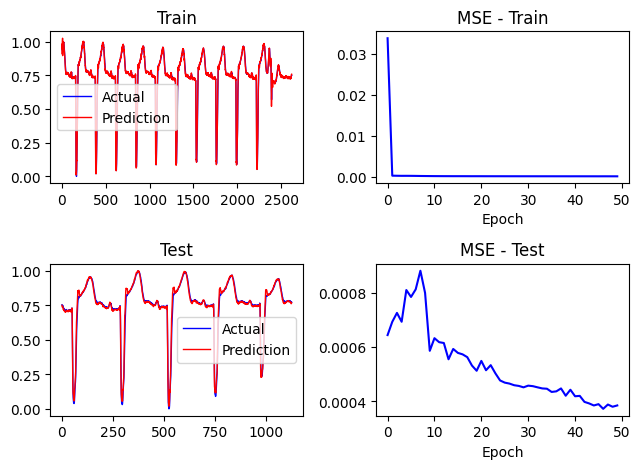

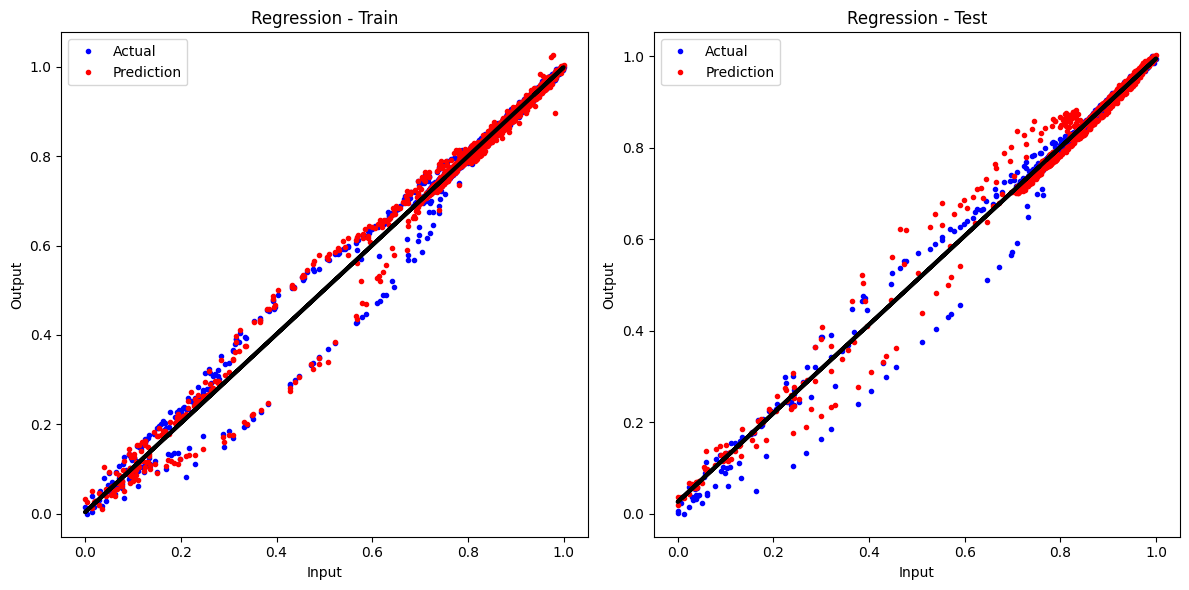

Final Train MSE: = 0.000102
Final Train MSE: = 0.000384


In [8]:
MSE_train = np.zeros(epoch_mlp)
MSE_test = np.zeros(epoch_mlp)

# Train the Model
for epoch in range(epoch_mlp):

    # Train Data
    output_train = np.zeros(num_train)
    error_train = np.zeros(num_train)

    for i in range(num_train):

        # Feed Forward
        input = X_train[i, :].reshape(-1,1)

        NET1 = np.dot(W1,input) + b1
        O1 = F1(NET1)

        NET2 = np.dot(W2,O1) + b2
        O2 = F2(NET2)

        NET3 = np.dot(W3,O2) + b3
        O3 = F3(NET3)

        NET4 = np.dot(W4,O3) + b4
        O3 = F4(NET4)

        output_train[i] = O3.item()
        error = d_train[i] - output_train[i]
        error_train[i] = error.item()


        # Back Propagation
        e = error.reshape(1,-1)
        DF1 = np.diagflat(dF1(NET1))
        DF2 = np.diagflat(dF2(NET2))
        DF3 = np.diagflat(dF3(NET3))
        DF4 = np.diagflat(dF4(NET4))

        # Calculate gradients

        grad_W1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ),W3),DF2) , W2), DF1) .T , input.reshape(1,-1) )
        grad_W2 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ),W3),DF2) .T , O1.reshape(1,-1) )
        grad_W3 = np.dot(np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ) .T , O2.reshape(1,-1) )
        grad_W4 = np.dot(np.dot( e , DF4 ).T , O3.reshape(1,-1) )

        if train_bias:
          grad_b1 = np.dot(np.dot(np.dot(np.dot(np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ),W3),DF2) , W2), DF1) .T
          grad_b2 = np.dot(np.dot(np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ),W3),DF2) .T
          grad_b3 = np.dot(np.dot(np.dot( e , DF4 ) , W4 ) , DF3 ) .T
          grad_b4 = np.dot( e , DF4 ).T


        # Update parameters
        W1 += eta1 * grad_W1
        W2 += eta2 * grad_W2
        W3 += eta3 * grad_W3
        W4 += eta4 * grad_W4

        if train_bias:
          b1 += eta1 * grad_b1
          b2 += eta2 * grad_b2
          b3 += eta3 * grad_b3
          b4 += eta4 * grad_b4



    MSE_train[epoch] = np.mean(np.square(error_train))

    # Test
    output_test = np.zeros(num_test)
    error_test = np.zeros(num_test)

    for i in range(num_test):

        # Feed Forward
        input = X_test[i, :].reshape(-1,1)

        NET1 = np.dot(W1,input) + b1
        O1 = F1(NET1)

        NET2 = np.dot(W2,O1) + b2
        O2 = F2(NET2)

        NET3 = np.dot(W3,O2) + b3
        O3 = F3(NET3)

        NET4 = np.dot(W4,O3) + b4
        O3 = F4(NET4)

        output_test[i] = O3.item()
        error = d_test[i] - output_test[i]
        error_test[i] = error.item()

    MSE_test[epoch] = np.mean(np.square(error_test))
    print(f"Epoch {epoch+1}/{epoch_mlp}, Train MSE: {MSE_train[epoch]:.6f}, Test MSE: {MSE_test[epoch]:.6f}")


plot_progress(epoch, X_train[:,0], output_train, MSE_train.reshape(-1,1), X_test[:,0], output_test, MSE_test.reshape(-1,1))

plt.show()

plot_regression(X_train, d_train, output_train, X_test, d_test, output_test)

print(f"Final Train MSE: = {MSE_train[-1]:.6f}")
print(f"Final Train MSE: = {MSE_test[-1]:.6f}")